In [30]:
import spotify_config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import pprint
import pandas as pd
import openpyxl
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [31]:
df1=pd.read_excel("audio_features_1.xlsx")

In [32]:

df2=pd.read_excel("audio_features_2.xlsx")
df3=pd.read_excel("audio_features_3.xlsx")
df4=pd.read_excel("audio_features_4.xlsx")
df5=pd.read_excel("audio_features_5.xlsx")
df6=pd.read_excel("audio_features_6.xlsx")
df7=pd.read_excel("audio_features_7.xlsx")
df8=pd.read_excel("audio_features_8.xlsx")
df9=pd.read_excel("audio_features_9.xlsx")
df10=pd.read_excel("audio_features_10.xlsx")
df11=pd.read_excel("audio_features_11.xlsx")
df12=pd.read_excel("audio_features_12.xlsx")
df13=pd.read_excel("audio_features_13.xlsx")
df14=pd.read_excel("audio_features_14.xlsx")
df15=pd.read_excel("audio_features_15.xlsx")

In [33]:
frames=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df10,df10,df10,df10,df10,df11,df12,df13,df14,df15]

In [34]:
songs_df = pd.concat(frames)
songs_df.to_excel("all_songs_features.xlsx")

In [11]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8451 entries, 0 to 224
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8451 non-null   int64  
 1   danceability      8451 non-null   float64
 2   energy            8451 non-null   float64
 3   loudness          8451 non-null   float64
 4   speechiness       8451 non-null   float64
 5   acousticness      8451 non-null   float64
 6   instrumentalness  8451 non-null   float64
 7   liveness          8451 non-null   float64
 8   valence           8451 non-null   float64
 9   tempo             8451 non-null   float64
 10  id                8451 non-null   object 
 11  duration_ms       8451 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 858.3+ KB


In [12]:
songs_df.drop_duplicates
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8451 entries, 0 to 224
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8451 non-null   int64  
 1   danceability      8451 non-null   float64
 2   energy            8451 non-null   float64
 3   loudness          8451 non-null   float64
 4   speechiness       8451 non-null   float64
 5   acousticness      8451 non-null   float64
 6   instrumentalness  8451 non-null   float64
 7   liveness          8451 non-null   float64
 8   valence           8451 non-null   float64
 9   tempo             8451 non-null   float64
 10  id                8451 non-null   object 
 11  duration_ms       8451 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 858.3+ KB


In [13]:
songs_df.head()

,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0,0.597,0.620,-8.079,0.0313,0.6110,0.897000,0.1180,0.225,116.029,0GAr2dDEqEXqlhQzvyZTsK,221047
1,1,0.642,0.621,-4.343,0.0551,0.2290,0.193000,0.1550,0.364,178.028,4FXzptXwH5Wz33SVat2uRt,216067
2,2,0.674,0.924,-4.943,0.1020,0.0143,0.000006,0.2160,0.811,123.040,0yM2YvOGR3cBIoWBeFdtmS,240053
3,3,0.771,0.594,-6.587,0.0410,0.1220,0.012600,0.0605,0.657,124.025,6Bgsu7Wc90sme8EfplwtxU,219462
4,4,0.883,0.624,-5.820,0.0847,0.2200,0.506000,0.2790,0.402,107.998,0r5Z0wgmOYDWHnhN4f8DtV,171111


In [14]:
songs_df.describe()

,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8.451000e+03
mean,478.602651,0.593896,0.643626,-8.331141,0.098496,0.257566,0.099965,0.184443,0.554399,119.180142,2.267463e+05
std,500.320089,0.187879,0.230503,5.003399,0.097926,0.304191,0.247968,0.148177,0.252987,29.360655,8.229240e+04
min,0.000000,0.066700,0.001880,-43.738000,0.022700,0.000002,0.000000,0.017700,0.027800,34.804000,4.240000e+04
25%,105.000000,0.468000,0.509000,-9.817000,0.037100,0.020400,0.000000,0.091500,0.364000,95.105000,1.776670e+05
50%,267.000000,0.604000,0.676000,-7.123000,0.051000,0.117000,0.000041,0.125000,0.570000,116.879000,2.152670e+05
75%,715.500000,0.738000,0.828000,-5.183000,0.115000,0.406000,0.008175,0.233000,0.766000,138.082000,2.587730e+05
max,1924.000000,0.974000,0.998000,-0.866000,0.579000,0.996000,0.987000,0.979000,0.992000,210.164000,1.577827e+06


In [15]:
songs_df2=songs_df.drop(columns=["Unnamed: 0"])

In [16]:
songs_df2.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8.451000e+03
mean,0.593896,0.643626,-8.331141,0.098496,0.257566,0.099965,0.184443,0.554399,119.180142,2.267463e+05
std,0.187879,0.230503,5.003399,0.097926,0.304191,0.247968,0.148177,0.252987,29.360655,8.229240e+04
min,0.066700,0.001880,-43.738000,0.022700,0.000002,0.000000,0.017700,0.027800,34.804000,4.240000e+04
25%,0.468000,0.509000,-9.817000,0.037100,0.020400,0.000000,0.091500,0.364000,95.105000,1.776670e+05
50%,0.604000,0.676000,-7.123000,0.051000,0.117000,0.000041,0.125000,0.570000,116.879000,2.152670e+05
75%,0.738000,0.828000,-5.183000,0.115000,0.406000,0.008175,0.233000,0.766000,138.082000,2.587730e+05
max,0.974000,0.998000,-0.866000,0.579000,0.996000,0.987000,0.979000,0.992000,210.164000,1.577827e+06


In [17]:
songs_df2_id = songs_df2.id
songs_df2 = songs_df2.drop('id', axis=1)


In [18]:
scaler = StandardScaler()
scaler.fit(songs_df2)
songs_df2_scaled = scaler.transform(songs_df2)
songs_df2_scaled_df = pd.DataFrame(songs_df2_scaled, columns = songs_df2.columns)
display(songs_df2.head())
print()
display(songs_df2_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.597,0.620,-8.079,0.0313,0.6110,0.897000,0.1180,0.225,116.029,221047
1,0.642,0.621,-4.343,0.0551,0.2290,0.193000,0.1550,0.364,178.028,216067
2,0.674,0.924,-4.943,0.1020,0.0143,0.000006,0.2160,0.811,123.040,240053
3,0.771,0.594,-6.587,0.0410,0.1220,0.012600,0.0605,0.657,124.025,219462
4,0.883,0.624,-5.820,0.0847,0.2200,0.506000,0.2790,0.402,107.998,171111


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.016521,-0.102502,0.050397,-0.686231,1.161949,3.214452,-0.448430,-1.302116,-0.107332,-0.069260
1,0.256051,-0.098163,0.797133,-0.443176,-0.093914,0.375213,-0.198714,-0.752648,2.004429,-0.129780
2,0.426383,1.216434,0.677208,0.035785,-0.799761,-0.403133,0.212980,1.014347,0.131471,0.161710
3,0.942702,-0.215306,0.348612,-0.587171,-0.445687,-0.352342,-0.836501,0.405584,0.165022,-0.088522
4,1.538864,-0.085147,0.501917,-0.140889,-0.123502,1.637545,0.638171,-0.602433,-0.380877,-0.676108


Training a K-Means model with 2 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 3 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 4 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 5 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 6 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 7 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 8 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 9 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 10 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 11 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 12 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 13 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 14 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 15 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 16 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 17 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 18 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 19 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 20 clusters! 



C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

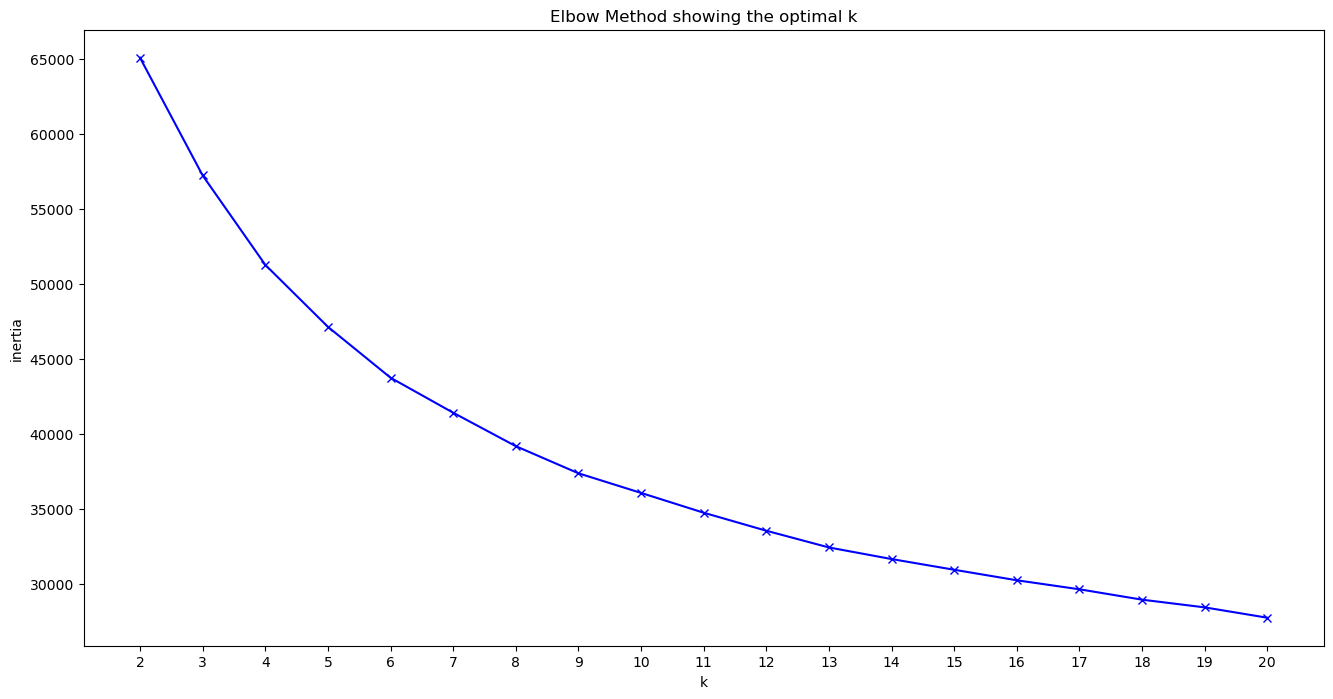

In [19]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(songs_df2_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [20]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(songs_df2_scaled_df)
print(kmeans2.inertia_)

57592.26993766868


C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fre

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

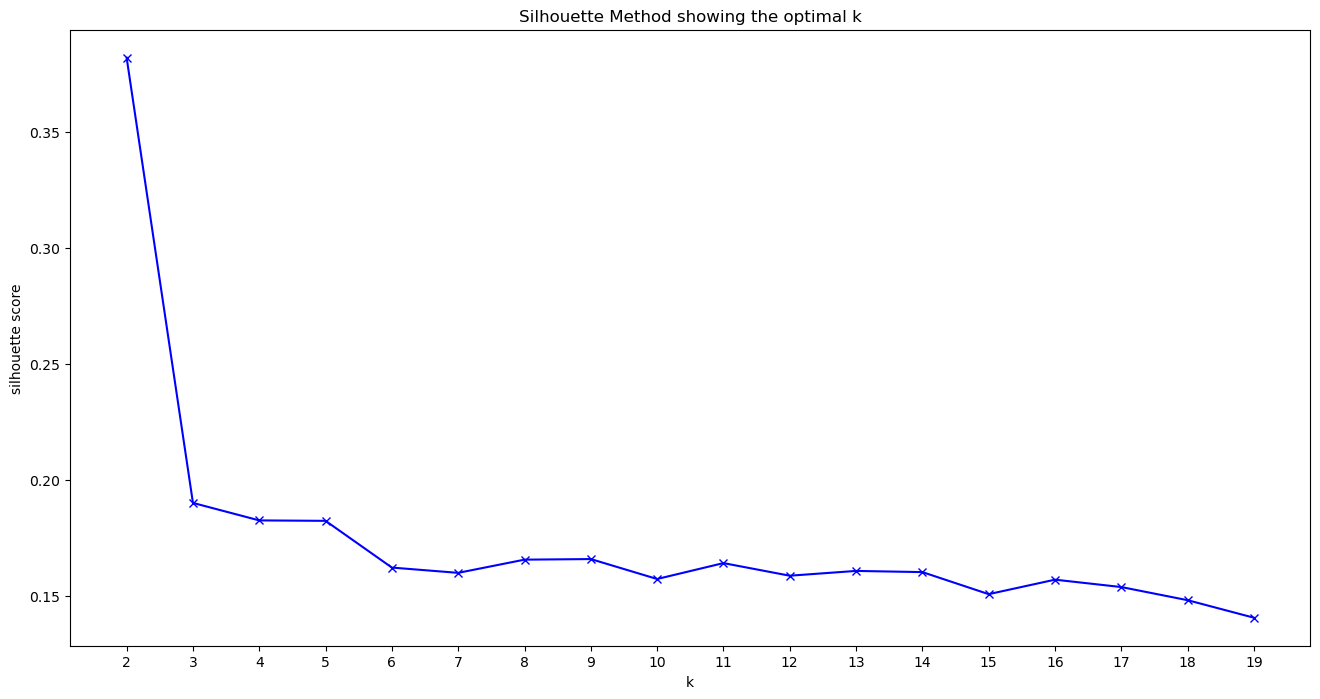

In [21]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(songs_df2_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(songs_df2_scaled_df, kmeans.predict(songs_df2_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [22]:
kmeans = KMeans(n_clusters=9, random_state=1234)
kmeans.fit(songs_df2_scaled_df)

C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=1234)

In [25]:
labels=kmeans.labels_
labels

array([8, 7, 1, ..., 1, 1, 7])

In [26]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

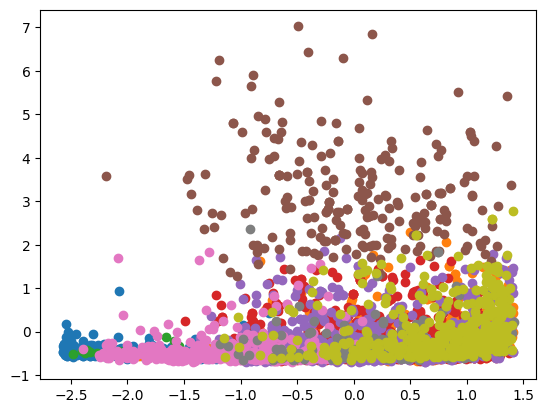

In [24]:
# assign a cluster to each example
labels = kmeans.predict(songs_df2_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(songs_df2_scaled_df.to_numpy()[row_ix, 1], songs_df2_scaled_df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [25]:
kmeans2 = KMeans(n_clusters=6, random_state=1234)
kmeans2.fit(songs_df2_scaled_df)

C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=1234)

In [26]:
labels2=kmeans2.labels_
labels2

array([5, 4, 0, ..., 5, 5, 0])

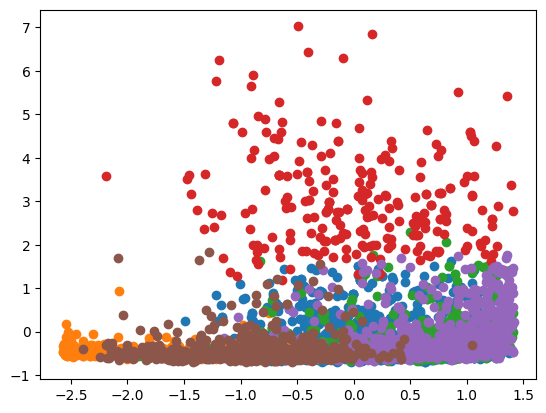

In [28]:
# assign a cluster to each example
labels2 = kmeans2.predict(songs_df2_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels2)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels2 == cluster)
    # create scatter of these samples
    pyplot.scatter(songs_df2_scaled_df.to_numpy()[row_ix, 1], songs_df2_scaled_df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [29]:
kmeans3 = KMeans(n_clusters=3, random_state=1234)
kmeans3.fit(songs_df2_scaled_df)

C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1234)

In [33]:
labels3=kmeans3.labels_
labels3

array([2, 0, 0, ..., 2, 2, 0])

In [41]:
len(labels3)

3467

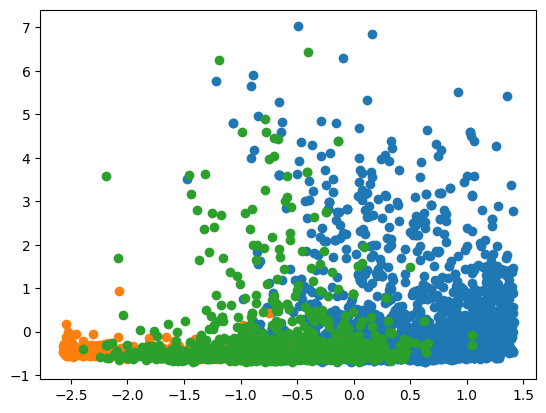

In [31]:
# assign a cluster to each example
labels3 = kmeans3.predict(songs_df2_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels3)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels3 == cluster)
    # create scatter of these samples
    pyplot.scatter(songs_df2_scaled_df.to_numpy()[row_ix, 1], songs_df2_scaled_df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [32]:
kmeans4 = KMeans(n_clusters=12, random_state=1234)
kmeans4.fit(songs_df2_scaled_df)

C:\Users\frede\.conda\envs\Ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=12, random_state=1234)

In [34]:
labels4=kmeans4.labels_
labels4

array([ 0, 11,  1, ...,  4,  0,  0])

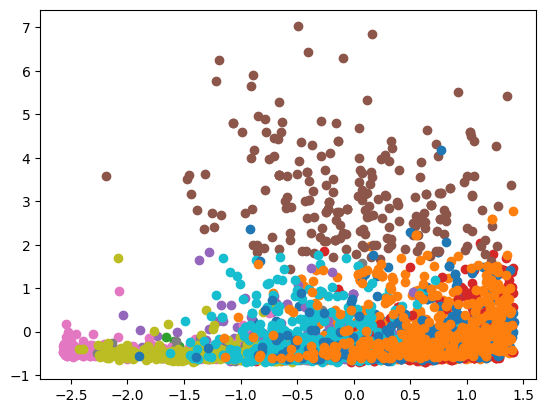

In [36]:
# assign a cluster to each example
labels4 = kmeans4.predict(songs_df2_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels4)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels4 == cluster)
    # create scatter of these samples
    pyplot.scatter(songs_df2_scaled_df.to_numpy()[row_ix, 1], songs_df2_scaled_df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [27]:
df_recommender1 = pd.DataFrame({'id': songs_df2_id, 'clusters': labels}, columns=['id', 'clusters'])

In [28]:
df_recommender1

,id,clusters
0,0GAr2dDEqEXqlhQzvyZTsK,8
1,4FXzptXwH5Wz33SVat2uRt,7
2,0yM2YvOGR3cBIoWBeFdtmS,1
3,6Bgsu7Wc90sme8EfplwtxU,1
4,0r5Z0wgmOYDWHnhN4f8DtV,8
...,...,...
220,2XTBQyBapzuWbx3ZByfOrn,1
221,5x1B2AjKhCVtYNHDbVAV1F,1
222,1xKEI3TDR1NjJSgAlC384x,1
223,0QXWOUB7LGccPIhfEGJcCU,1


In [29]:
df.to_excel("audio_features_10.xlsx")

NameError: name 'df' is not defined